<a href="https://colab.research.google.com/github/feuziq47/DL/blob/master/DL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#perceptron AND gate구현

import numpy as np
def AND(x1,x2):
  x=np.array([x1,x2])
  w=np.array([0.5,0.5])
  b=-0.7
  tmp=np.sum(w*x)+b
  
  if tmp<=0:
    return 0
  else:
    return 1

In [0]:
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))

0
0
0
1


In [0]:
#perceptron OR gate구현

import numpy as np
def OR(x1,x2):
  x=np.array([x1,x2])
  w=np.array([0.5,0.5])
  b=-0.2
  tmp=np.sum(w*x)+b
  
  if tmp<=0:
    return 0
  else:
    return 1

In [0]:
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


In [0]:
#perceptron NAND gate구현

import numpy as np
def NAND(x1,x2):
  x=np.array([x1,x2])
  w=np.array([-0.5,-0.5])
  b=0.7
  tmp=np.sum(w*x)+b
  
  if tmp<=0:
    return 0
  else:
    return 1

In [0]:
print(NAND(0,0))
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))

1
1
1
0


In [0]:
#다층 perceptron을 이용한 XOR gate 구현
def XOR(x1,x2):
  s1=NAND(x1,x2)
  s2=OR(x1,x2)
  y=AND(s1,s2)
  return y

In [0]:
print(XOR(0,0))
print(XOR(0,1))
print(XOR(1,0))
print(XOR(1,1))

0
1
1
0


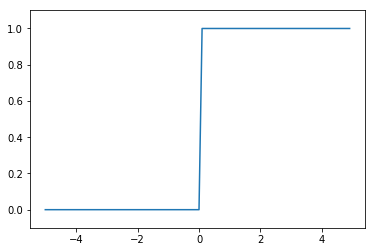

In [0]:
#Step Function 구현 및 시각화
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0,dtype=np.int)

X=np.arange(-5.0,5.0,0.1)
Y=step_function(X)
plt.plot(X,Y)
plt.ylim(-0.1,1.1)
plt.show()

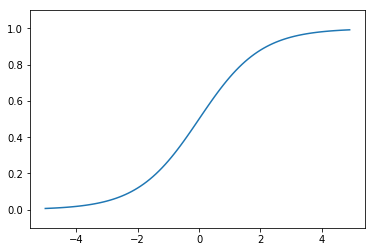

In [0]:
#Sigmoid Function 구현 및 시각화
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))
X=np.arange(-5.0,5.0,0.1)
Y=sigmoid_function(X)
plt.plot(X,Y)
plt.ylim(-0.1,1.1)
plt.show()

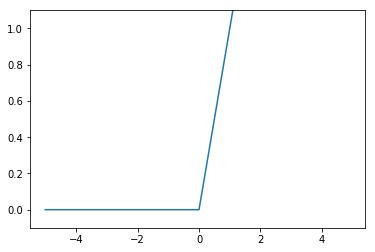

In [0]:
#Relu Function 구현 및 시각화
import numpy as np
import matplotlib.pylab as plt

def relu(x):
  return np.maximum(0,x)
X=np.arange(-5.0,5.0,0.1)
Y=relu(X)
plt.plot(X,Y)
plt.ylim(-0.1,1.1)
plt.show()

In [0]:
# 1st Layer1
X=np.array([1.0,0.5])
W1=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1=np.array([0.1,0.2,0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1=np.dot(X,W1)+B1

(2,)
(2, 3)
(3,)


In [0]:
# 1st Layer2
Z1=sigmoid(A1)
print(A1)
print(Z1)
R1=relu(A1)
print(R1)
S1=step_function(A1)
print(S1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]
[0.3 0.7 1.1]
[1 1 1]


In [0]:
# 2nd Layer
W2=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2=np.array([0.1,0.2])
print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2=np.dot(Z1,W2)+B2
Z2=sigmoid(A2)
print(A2)
print(Z2)
Z2=relu(A2)
print(Z2)

(3,)
(3, 2)
(2,)
[0.51615984 1.21402696]
[0.62624937 0.7710107 ]
[0.51615984 1.21402696]


In [0]:
# Output_Layer
def identity_function(x):
  return x
W3=np.array([[0.1,0.3],[0.2,0.4]])
B3=np.array([0.1,0.2])
A3=np.dot(Z2,W3)+B3
Y=identity_function(A3)
print(Y)

[0.39442138 0.84045873]


In [0]:
# Neural Network1(Definition)
def init_network():
  network={}
  network['W1']=np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1']=np.array([0.1,0.2,0.3])
  network['W2']=np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2']=np.array([0.1,0.2])
  network['W3']=np.array([[0.1,0.3],[0.2,0.4]])
  network['b3']=np.array([[0.1,0.2]])
  
  return network

def forward(network,x):
  W1,W2,W3=network['W1'],network['W2'],network['W3']
  b1,b2,b3=network['b1'],network['b2'],network['b3']
  
  a1=np.dot(x,W1)+b1
  z1=sigmoid(a1)
  a2=np.dot(z1,W2)+b2
  z2=sigmoid(a2)
  a3=np.dot(z2,W3)+b3
  y=identity_function(a3)
  
  return y

In [0]:
# Neural Network2(Execution)
network=init_network()
x=np.array([1.0,0.5])
y=forward(network,x)
print(y)

[[0.31682708 0.69627909]]
